In [18]:
#Import Dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [19]:
#Load Data
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX (1).csv


In [20]:
#Store Data in Data Frame
df = pd.read_csv('NFLX.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-31,525.530029,545.500000,523.150024,540.729980,540.729980,5392300
1,2021-01-04,539.000000,540.799988,515.090027,522.859985,522.859985,4444400
2,2021-01-05,521.549988,526.780029,515.890015,520.799988,520.799988,3133900
3,2021-01-06,511.970001,513.099976,499.500000,500.489990,500.489990,5346200
4,2021-01-07,508.279999,516.440002,506.420013,508.890015,508.890015,3686400
5,2021-01-08,511.309998,513.239990,504.510010,510.399994,510.399994,2973900


In [21]:
df.shape

(252, 7)

<function matplotlib.pyplot.show>

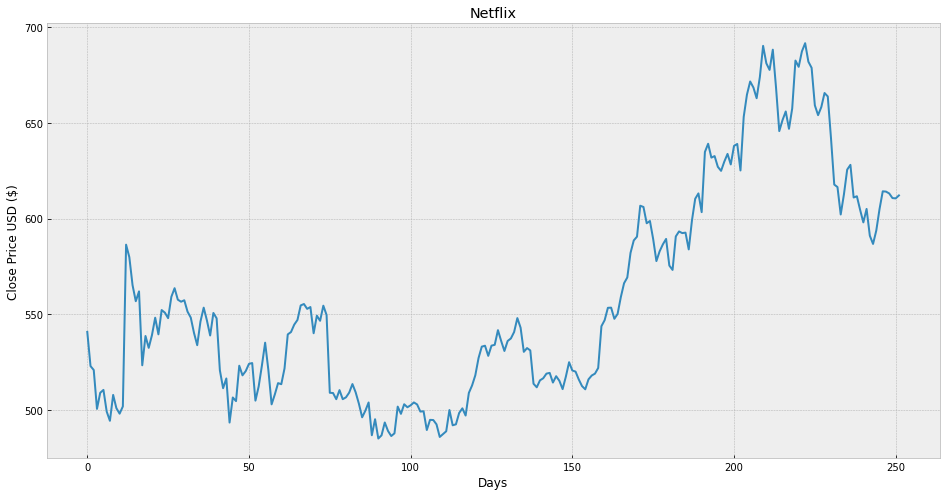

In [22]:
#Visualize Close Price Data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show

In [23]:
#Extract the Close Price
df = df[['Close']]
df.head(4)

,Close
0,540.729980
1,522.859985
2,520.799988
3,500.489990


In [24]:
#Variable defining x future days
future_days = 30

#Create Column (Target) for x units/days
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Close,Prediction
248,613.119995,NaN
249,610.710022,NaN
250,610.539978,NaN
251,612.090027,NaN


In [25]:
#Create Feature Dataset (X) and converting array to remove last 'x' rows/days
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)


[[540.72998 ]
 [522.859985]
 [520.799988]
 [500.48999 ]
 [508.890015]
 [510.399994]
 [499.100006]
 [494.25    ]
 [507.790009]
 [500.859985]
 [497.980011]
 [501.769989]
 [586.340027]
 [579.840027]
 [565.169983]
 [556.780029]
 [561.929993]
 [523.280029]
 [538.599976]
 [532.390015]
 [539.039978]
 [548.159973]
 [539.450012]
 [552.159973]
 [550.789978]
 [547.919983]
 [559.070007]
 [563.590027]
 [557.590027]
 [556.52002 ]
 [557.280029]
 [551.340027]
 [548.219971]
 [540.219971]
 [533.780029]
 [546.150024]
 [553.409973]
 [546.700012]
 [538.849976]
 [550.640015]
 [547.820007]
 [520.700012]
 [511.290009]
 [516.390015]
 [493.329987]
 [506.440002]
 [504.540009]
 [523.059998]
 [518.02002 ]
 [520.25    ]
 [524.030029]
 [524.440002]
 [504.790009]
 [512.179993]
 [523.109985]
 [535.090027]
 [520.809998]
 [502.859985]
 [508.049988]
 [513.950012]
 [513.390015]
 [521.659973]
 [539.419983]
 [540.669983]
 [544.530029]
 [546.98999 ]
 [554.580017]
 [555.309998]
 [552.780029]
 [553.72998 ]
 [540.02002 ]
 [549.

In [26]:
#Create Target Dataset (y) and convert to array
y = np.array(df['Prediction'])[:-future_days]
print(y)


[557.280029 551.340027 548.219971 540.219971 533.780029 546.150024
 553.409973 546.700012 538.849976 550.640015 547.820007 520.700012
 511.290009 516.390015 493.329987 506.440002 504.540009 523.059998
 518.02002  520.25     524.030029 524.440002 504.790009 512.179993
 523.109985 535.090027 520.809998 502.859985 508.049988 513.950012
 513.390015 521.659973 539.419983 540.669983 544.530029 546.98999
 554.580017 555.309998 552.780029 553.72998  540.02002  549.219971
 546.539978 554.440002 549.570007 508.899994 508.779999 505.549988
 510.299988 505.549988 506.519989 509.       513.469971 509.109985
 503.179993 496.079987 499.549988 503.839996 486.690002 495.079987
 484.980011 486.660004 493.369995 488.940002 486.279999 487.700012
 501.670013 497.890015 502.899994 501.339996 502.359985 503.859985
 502.809998 499.079987 499.23999  489.429993 494.73999  494.660004
 492.390015 485.809998 487.269989 488.769989 499.890015 491.899994
 492.410004 498.339996 500.769989 497.       508.820007 512.739

In [27]:
#Splitting Data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [28]:
#Create Decision Tree Model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create Linea Regression Model
lr = LinearRegression().fit(x_train, y_train)

In [29]:
#Fetch last 'x' rows of Feature Dataset
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future


array([[639.099976],
       [631.849976],
       [632.659973],
       [627.039978],
       [624.940002],
       [629.76001 ],
       [633.799988],
       [628.289978],
       [637.969971],
       [639.      ],
       [625.140015],
       [653.159973],
       [664.780029],
       [671.659973],
       [668.52002 ],
       [662.919983],
       [674.049988],
       [690.309998],
       [681.169983],
       [677.719971],
       [688.289978],
       [668.400024],
       [645.719971],
       [651.450012],
       [655.98999 ],
       [646.909973],
       [657.580017],
       [682.609985],
       [679.330017],
       [687.400024]])

In [30]:
#Prediction Tree
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()


[617.77002  682.02002  678.799988 659.200012 654.059998 658.289978
 665.640015 659.200012 641.900024 617.77002  616.469971 604.919983
 611.       625.580017 628.080017 611.       611.659973 604.559998
 610.539978 605.039978 591.059998 586.72998  593.73999  604.919983
 614.23999  614.090027 613.119995 610.539978 610.539978 591.059998]



In [31]:
linear_prediction = lr.predict(x_future)
print(linear_prediction)

[624.28189058 619.1615711  619.73363226 615.76450538 614.28139531
 617.6855306  620.53876895 616.64731909 623.48382346 624.21128243
 614.42265469 634.21177698 642.41845271 647.27741978 645.05982496
 641.10479344 648.96537018 660.44901788 653.9938735  651.5572992
 659.02237682 644.97507767 628.95726841 633.00411538 636.21047921
 629.79770847 637.33343731 655.01087629 652.69439574 658.39384595]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


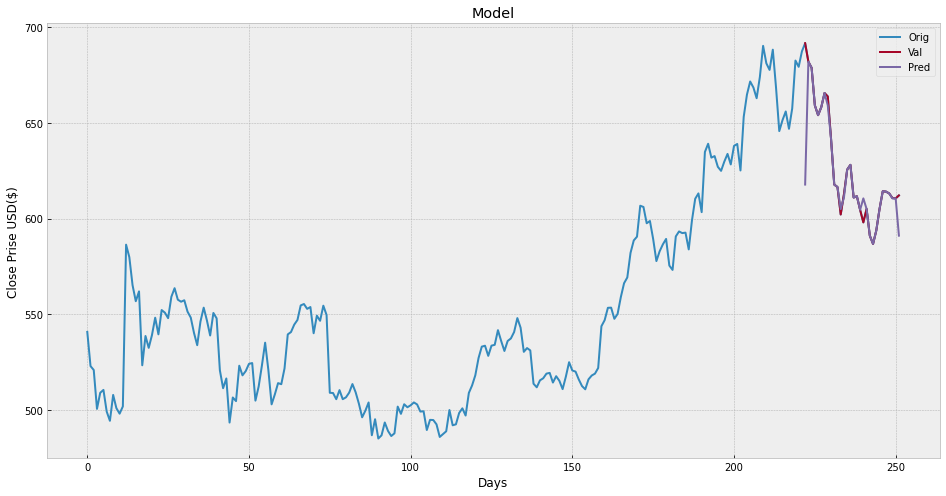

In [32]:
#Visualize Data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel( 'Close Prise USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()